In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("lungs cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [4]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    1518
NO     1482
Name: count, dtype: int64

In [6]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({"YES":1, "NO":0})
df['LUNG_CANCER'].dtype

dtype('int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GENDER,3000,2,M,1514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,3000.0,NaN,NaN,NaN,55.169,14.723746,30.0,42.0,55.0,68.0,80.0
SMOKING,3000.0,NaN,NaN,NaN,1.491,0.500002,1.0,1.0,1.0,2.0,2.0
YELLOW_FINGERS,3000.0,NaN,NaN,NaN,1.514,0.499887,1.0,1.0,2.0,2.0,2.0
ANXIETY,3000.0,NaN,NaN,NaN,1.494,0.500047,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,3000.0,NaN,NaN,NaN,1.499,0.500082,1.0,1.0,1.0,2.0,2.0
CHRONIC_DISEASE,3000.0,NaN,NaN,NaN,1.509667,0.49999,1.0,1.0,2.0,2.0,2.0
FATIGUE,3000.0,NaN,NaN,NaN,1.489667,0.499977,1.0,1.0,1.0,2.0,2.0
ALLERGY,3000.0,NaN,NaN,NaN,1.506667,0.500039,1.0,1.0,2.0,2.0,2.0
WHEEZING,3000.0,NaN,NaN,NaN,1.497333,0.500076,1.0,1.0,1.0,2.0,2.0


In [9]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [10]:
def unique_values():
    for column in df.columns:
        print(f"{column} : {df[column].unique()}")

In [11]:
unique_values()

GENDER : ['M' 'F']
AGE : [65 55 78 60 80 58 70 74 77 67 35 79 39 62 64 66 76 48 33 47 50 36 37 51
 53 72 71 54 41 46 59 32 34 44 38 69 45 40 63 75 52 31 57 73 42 56 68 61
 30 49 43]
SMOKING : [1 2]
YELLOW_FINGERS : [1 2]
ANXIETY : [1 2]
PEER_PRESSURE : [2 1]
CHRONIC_DISEASE : [2 1]
FATIGUE : [1 2]
ALLERGY : [2 1]
WHEEZING : [2 1]
ALCOHOL_CONSUMING : [2 1]
COUGHING : [2 1]
SHORTNESS_OF_BREATH : [2 1]
SWALLOWING_DIFFICULTY : [2 1]
CHEST_PAIN : [1 2]
LUNG_CANCER : [0 1]


In [12]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [13]:
np.mean(df['AGE'])

np.float64(55.169)

In [14]:
df[df['LUNG_CANCER'] == 1][df['ALLERGY'] == 2]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
5,F,58,1,1,1,2,2,2,2,1,2,2,1,1,2,1
6,F,70,1,1,1,2,2,1,2,2,2,2,2,2,1,1
11,F,60,2,2,1,1,1,1,2,2,2,1,1,2,1,1
16,M,62,1,1,2,2,1,1,2,2,1,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,M,55,2,1,1,2,2,2,2,1,1,1,2,2,2,1
2990,F,57,2,1,2,2,1,1,2,2,1,2,1,1,2,1
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,1
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,1


(array([286., 303., 272., 297., 314., 291., 291., 299., 259., 388.]),
 array([30., 35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 [<matplotlib.patches.Polygon at 0x1c927663fb0>])

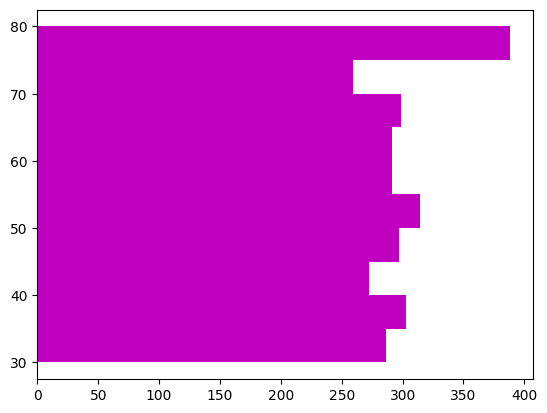

In [15]:
plt.hist(data=df, x="AGE", histtype='stepfilled', orientation='horizontal', color='m', stacked=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c927763ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c927763f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c927763800>],
 'medians': [<matplotlib.lines.Line2D at 0x1c92779c530>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c92779c800>],
 'means': []}

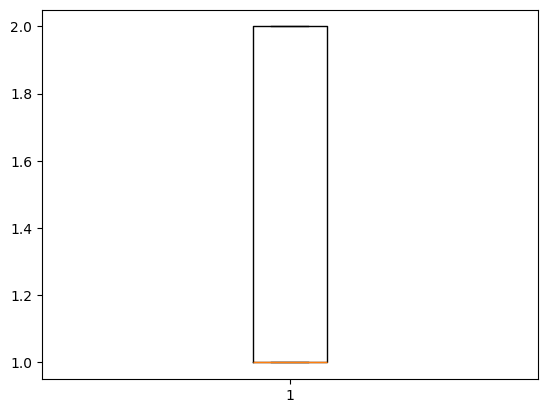

In [16]:
plt.boxplot(x=df['SMOKING'])

In [17]:
num_col = [col for col in df.columns if df[col].dtype != "O"]
num_col

['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC_DISEASE',
 'FATIGUE',
 'ALLERGY',
 'WHEEZING',
 'ALCOHOL_CONSUMING',
 'COUGHING',
 'SHORTNESS_OF_BREATH',
 'SWALLOWING_DIFFICULTY',
 'CHEST_PAIN',
 'LUNG_CANCER']

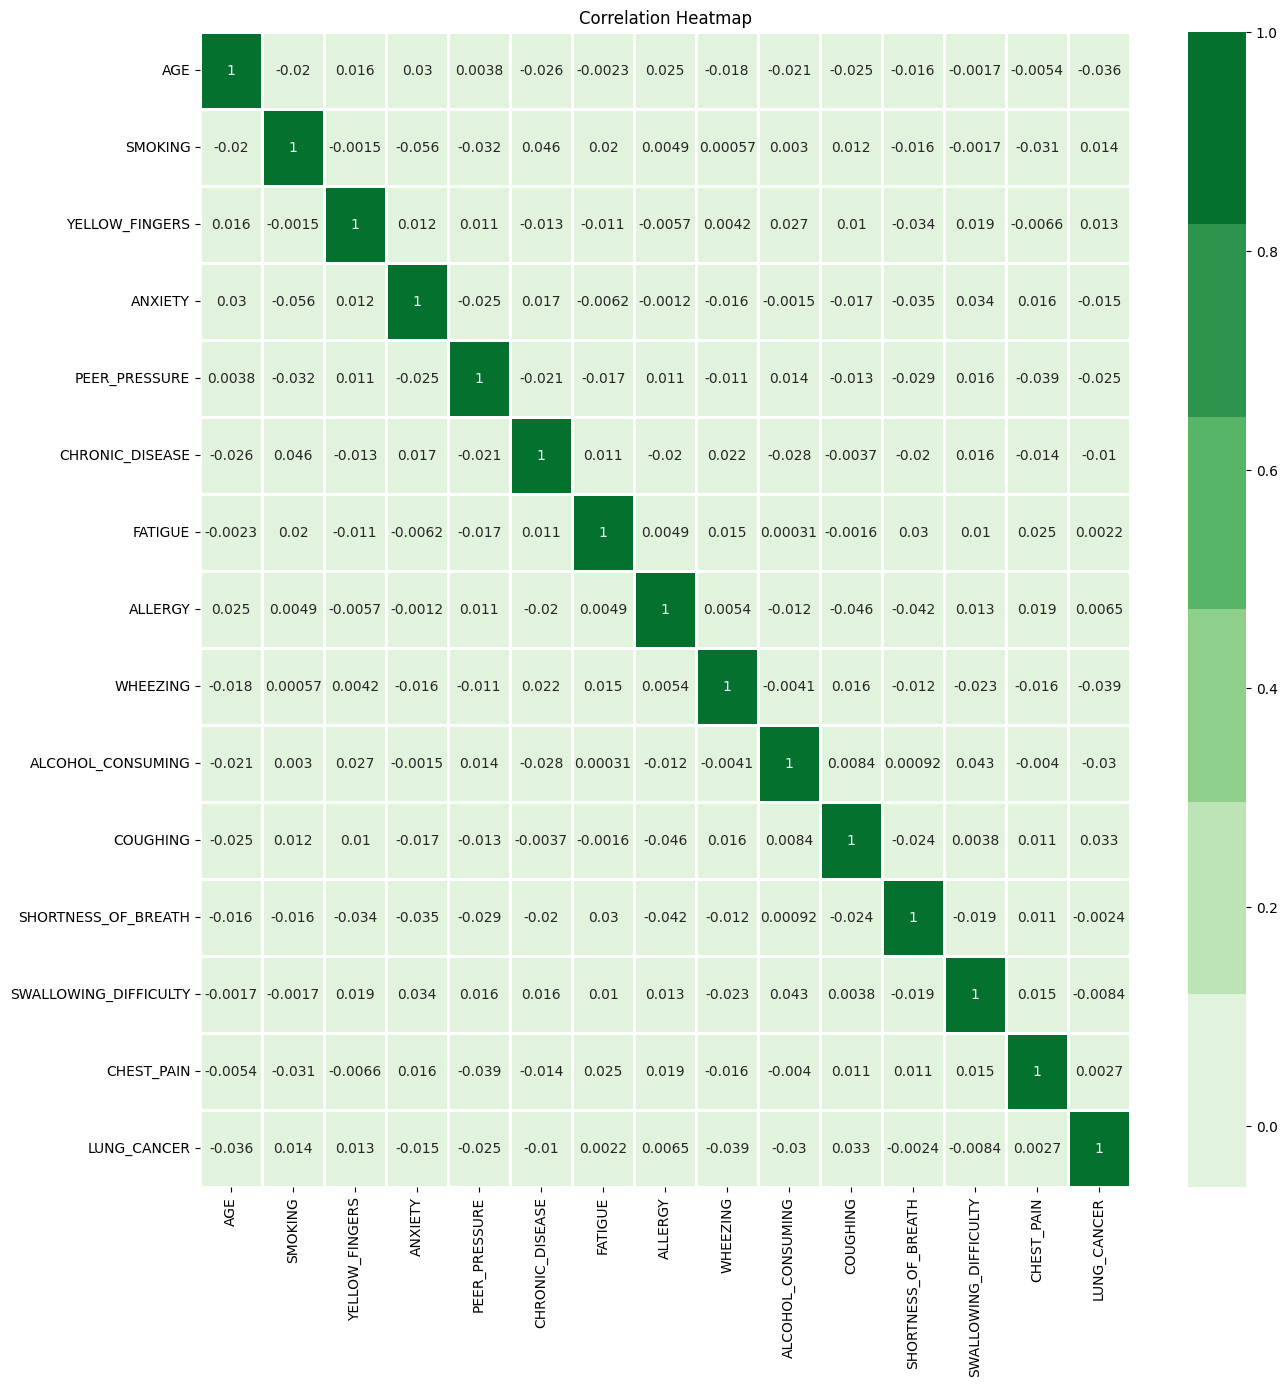

In [18]:
plt.figure(figsize=(15,15))
colormap = sns.color_palette("Greens") 
correlation_matrix = df[num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap=colormap, linewidths=2, linecolor='w')
plt.title("Correlation Heatmap")
plt.show()


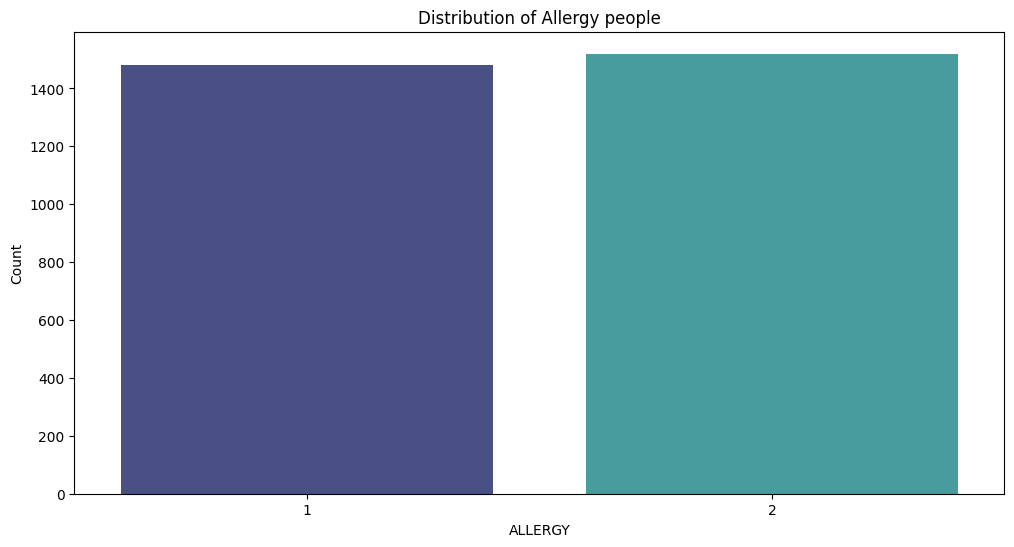

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x="ALLERGY", data=df, palette='mako')
plt.xlabel("ALLERGY")
plt.ylabel("Count")
plt.title("Distribution of Allergy people")
plt.show()


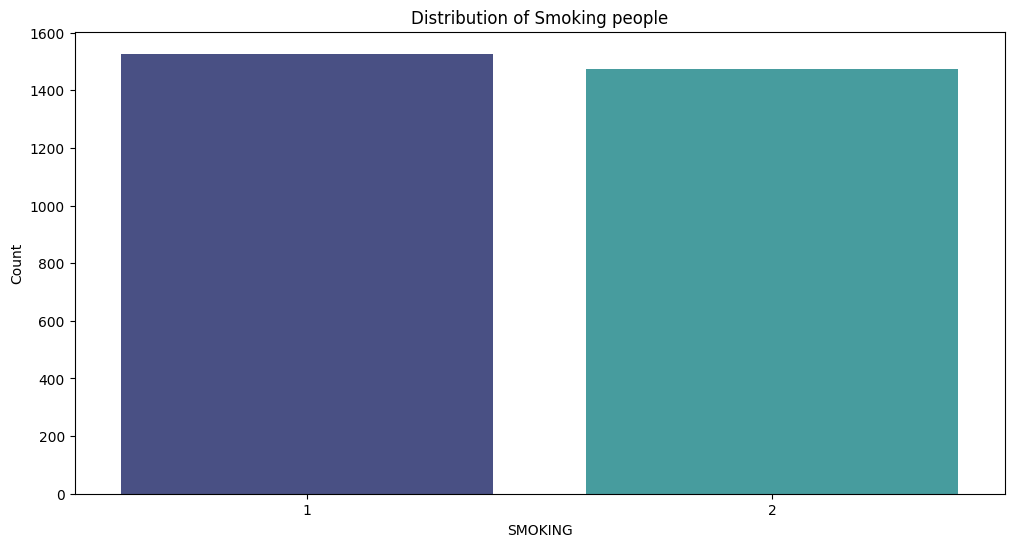

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x="SMOKING", data=df, palette='mako')
plt.xlabel("SMOKING")
plt.ylabel("Count")
plt.title("Distribution of Smoking people")
plt.show()


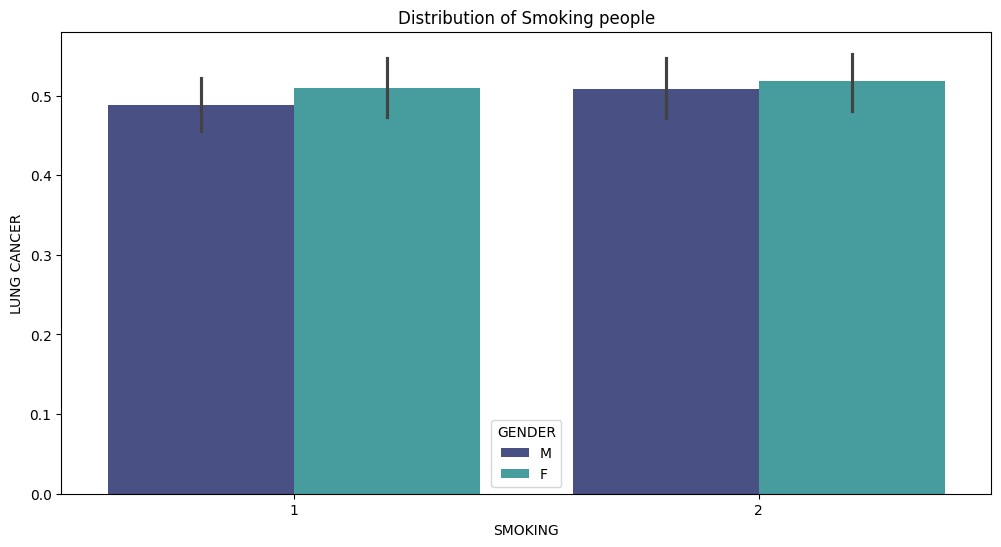

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='SMOKING', y='LUNG_CANCER', hue='GENDER', palette='mako')
plt.xlabel("SMOKING")
plt.ylabel("LUNG CANCER")
plt.title("Distribution of Smoking people")
plt.show()

In [22]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

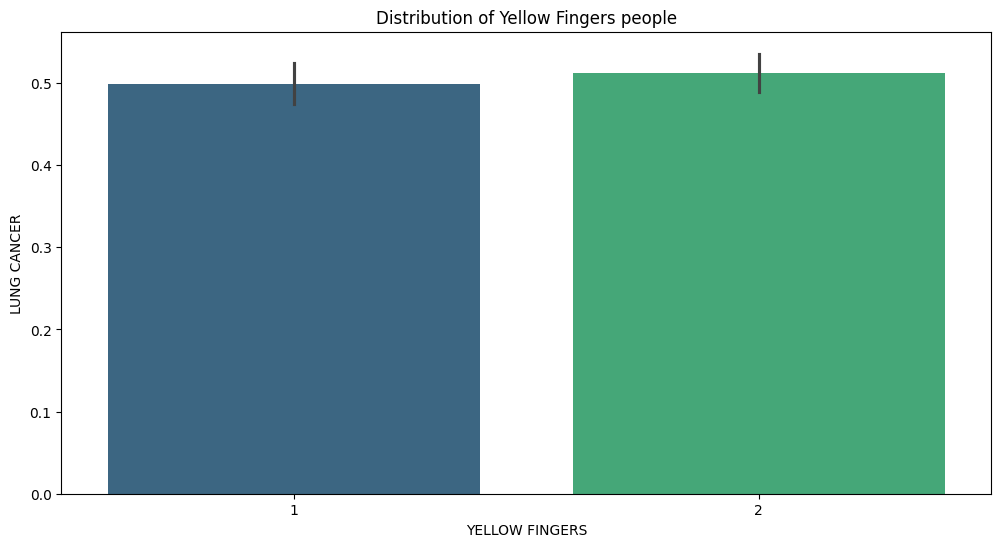

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='YELLOW_FINGERS', y='LUNG_CANCER', palette='viridis')
plt.xlabel("YELLOW FINGERS")
plt.ylabel("LUNG CANCER")
plt.title("Distribution of Yellow Fingers people")
plt.show()

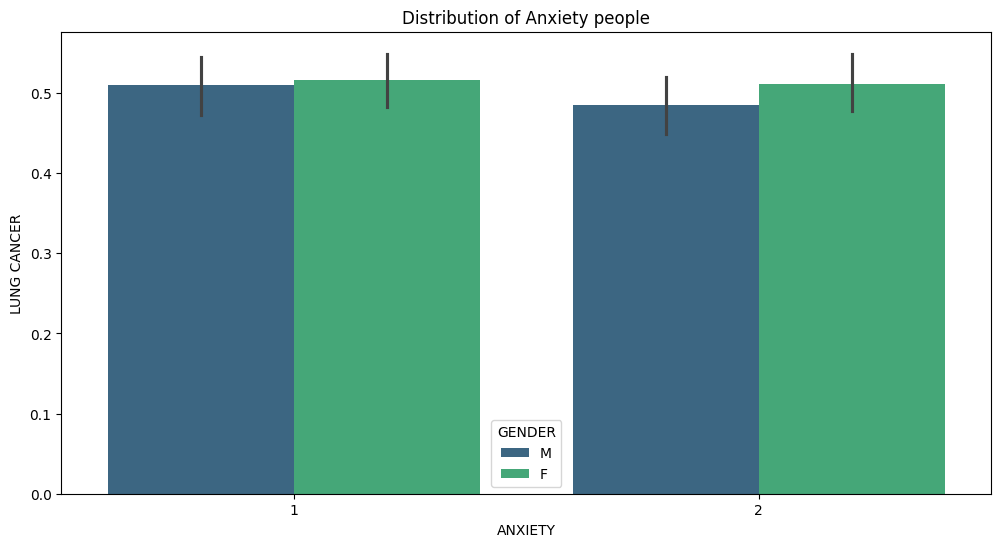

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='ANXIETY', y='LUNG_CANCER', palette='viridis', hue='GENDER')
plt.xlabel("ANXIETY")
plt.ylabel("LUNG CANCER")
plt.title("Distribution of Anxiety people")
plt.show()

In [25]:
#plt.figure(figsize=(12,6))
#px.colors.qualitative.Pastel2().show()
px.bar(data_frame=df, x='WHEEZING', y='LUNG_CANCER', color='GENDER', color_discrete_map={1:"red", 2:"pink"}).show()
# plt.xlabel("ANXIETY")
# plt.ylabel("LUNG CANCER")
# plt.title("Distribution of Anxiety people")
plt.show()

<Axes: ylabel='Density'>

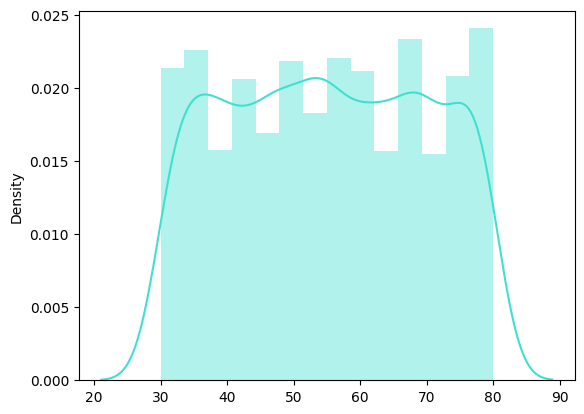

In [26]:
sns.distplot(x=df['AGE'], color='turquoise')

<Axes: xlabel='AGE', ylabel='LUNG_CANCER'>

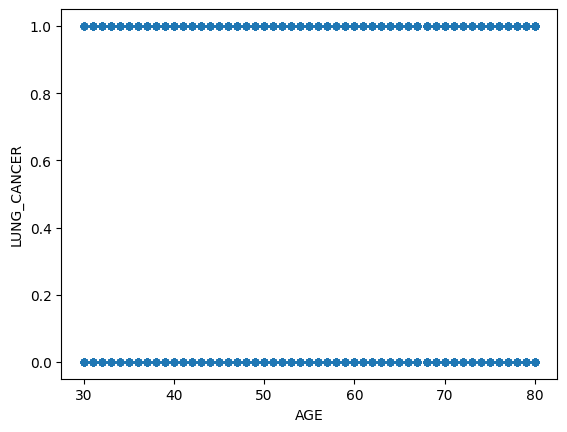

In [27]:
df.plot.scatter(x='AGE', y='LUNG_CANCER')

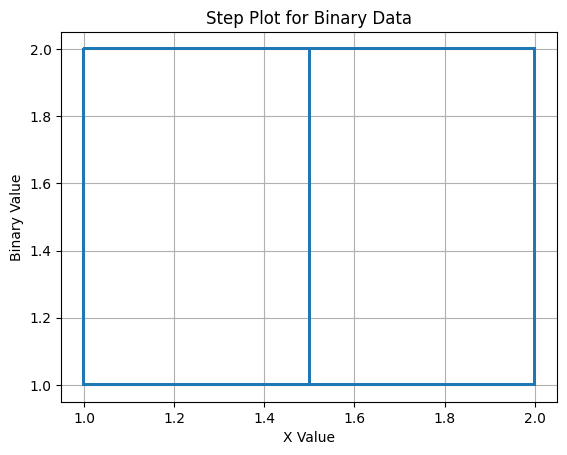

In [28]:
plt.step(x=df['ANXIETY'], y=df['CHEST_PAIN'], where='mid')
plt.xlabel("X Value")
plt.ylabel("Binary Value")
plt.title("Step Plot for Binary Data")
plt.grid(True)
plt.show()

<Axes: xlabel='AGE', ylabel='LUNG_CANCER'>

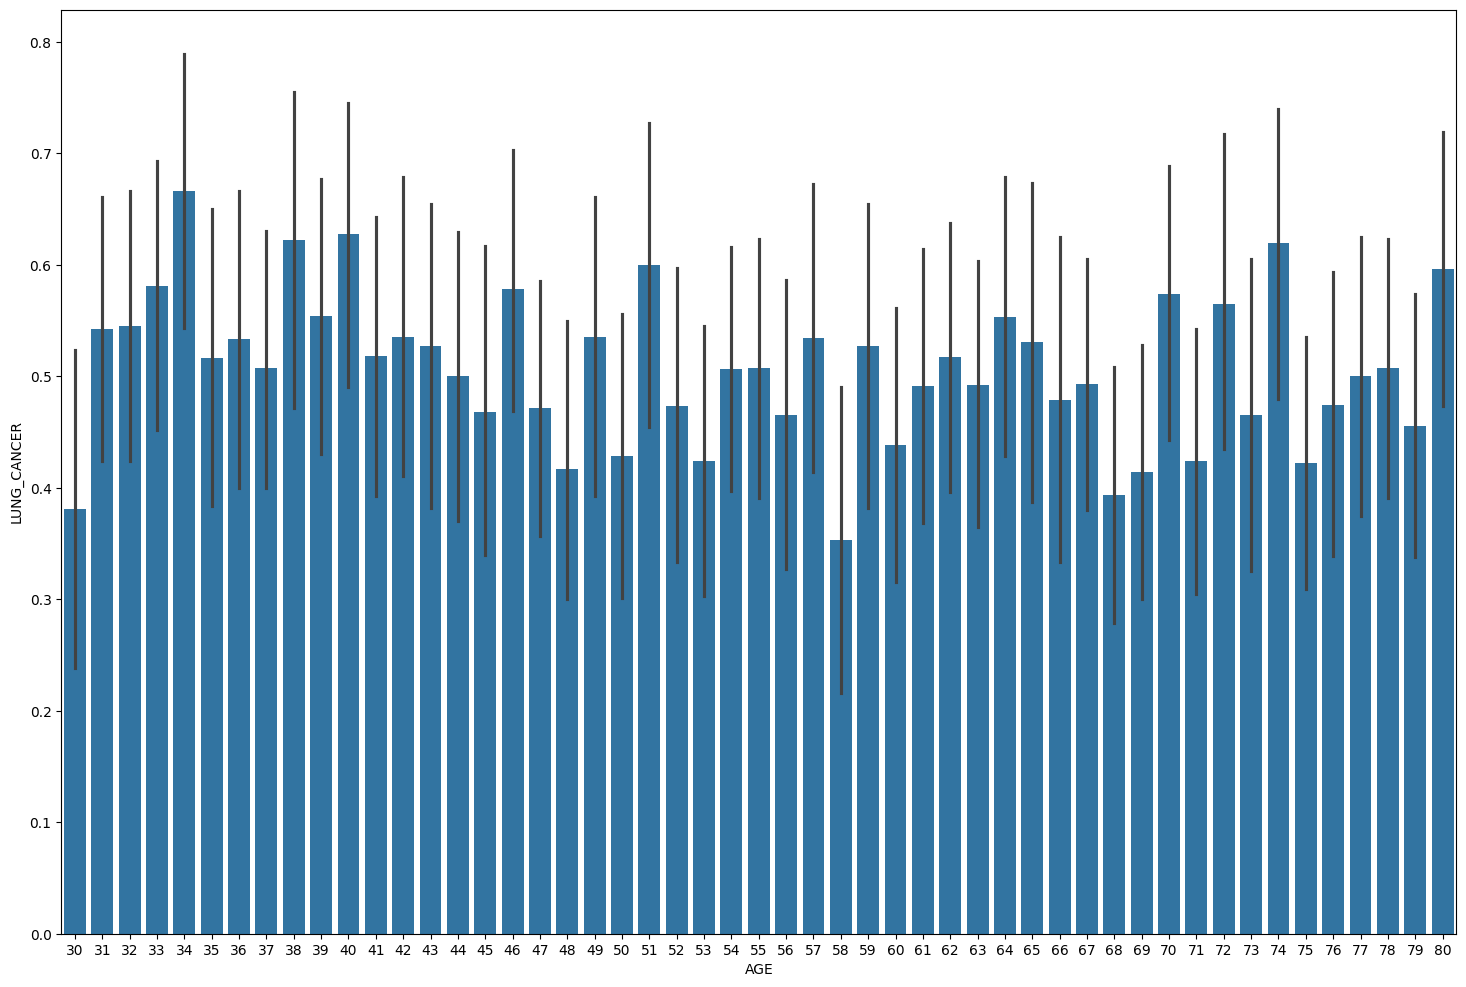

In [29]:
plt.figure(figsize=(18,12))
sns.barplot(data=df, x=df['AGE'], y=df['LUNG_CANCER'])

In [30]:
px.bar(x=df['AGE'], y=df['LUNG_CANCER'])

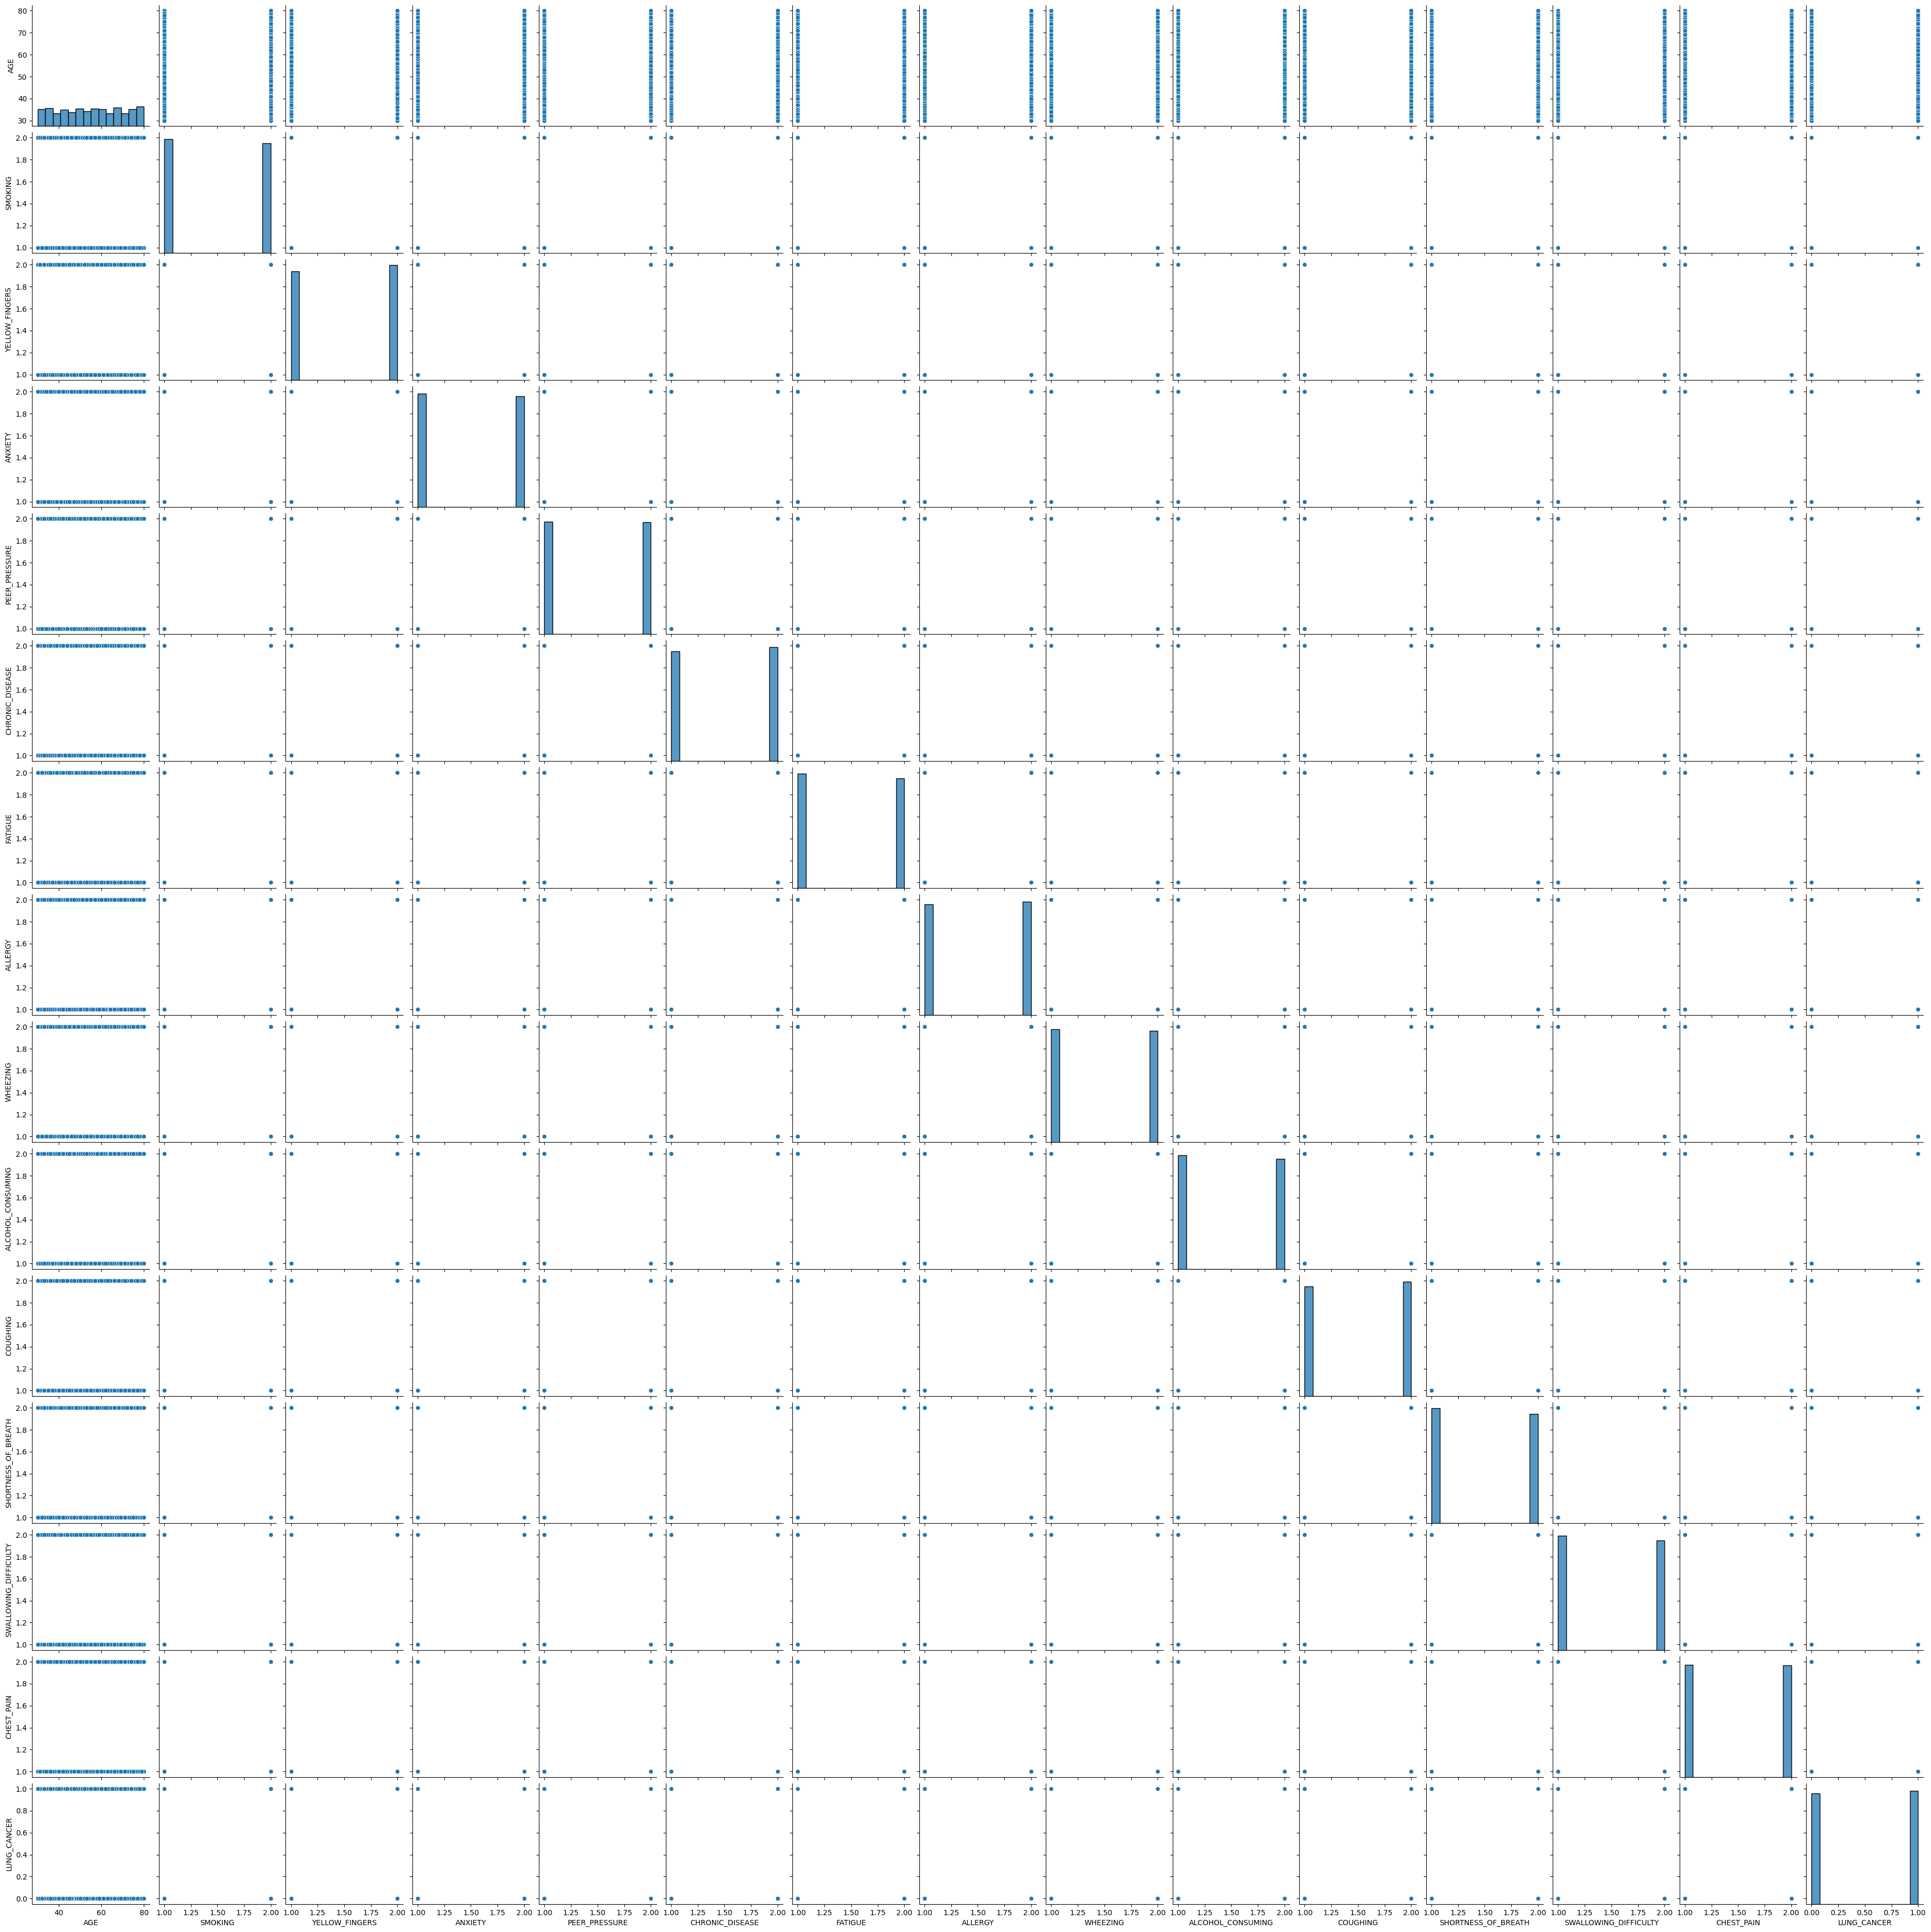

In [31]:
sns.pairplot(data=df, palette='dark')
plt.show()

In [33]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

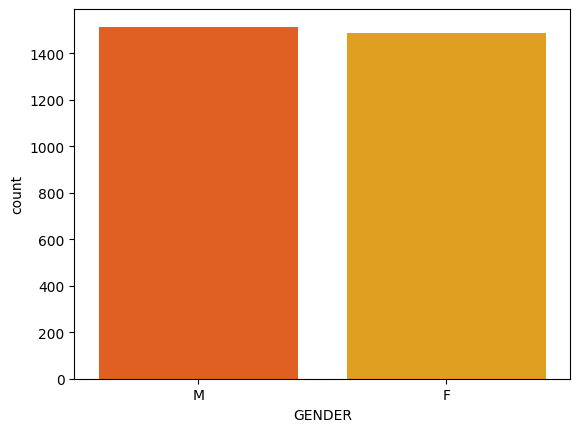

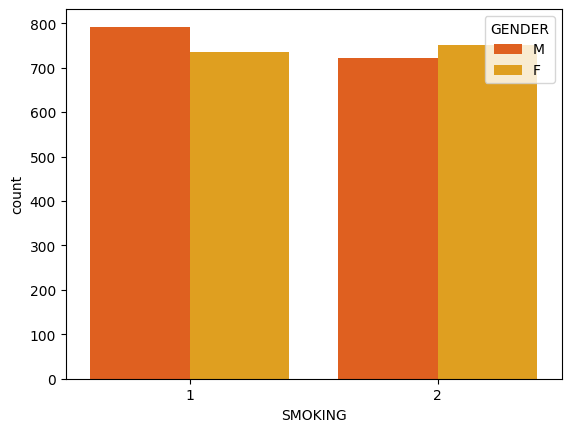

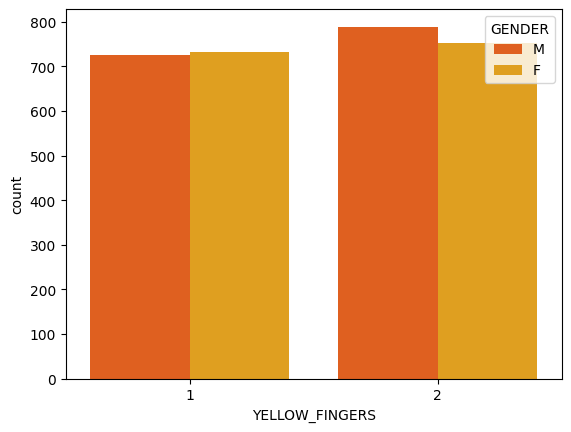

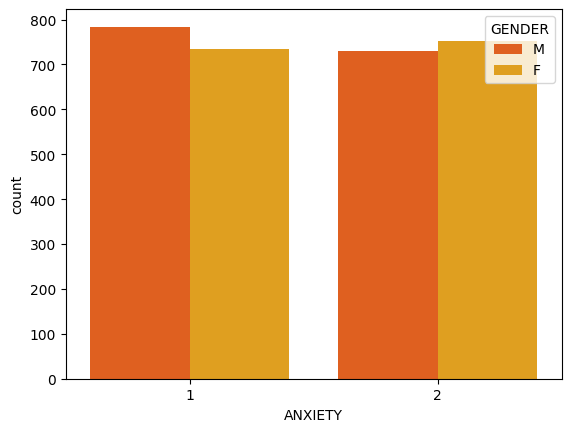

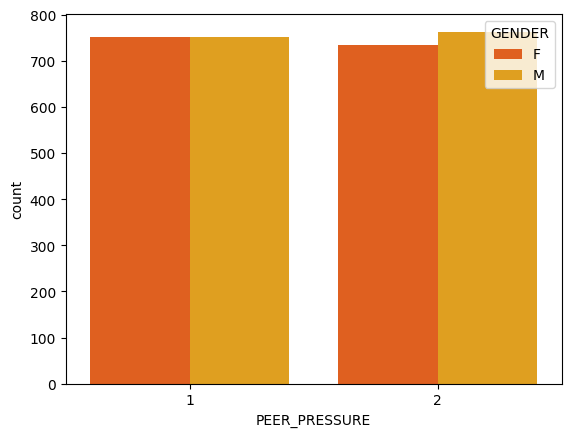

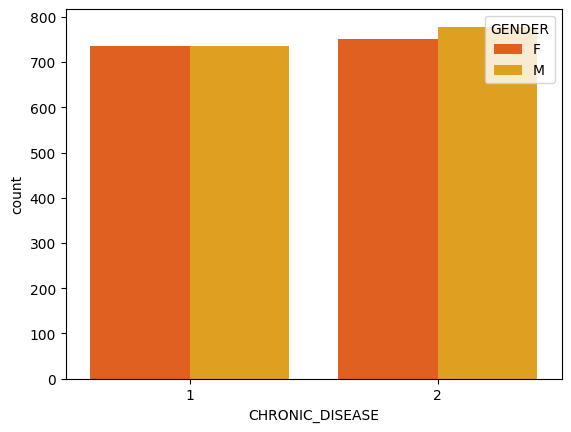

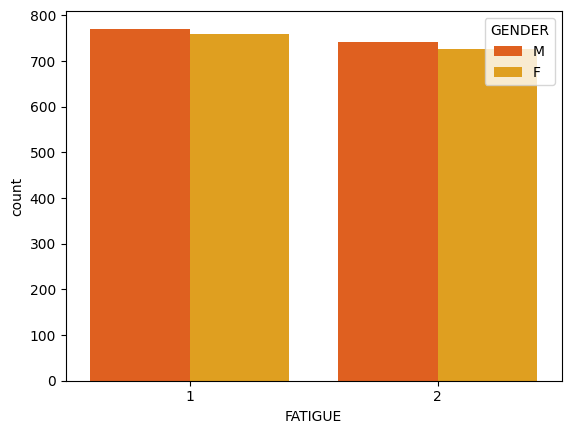

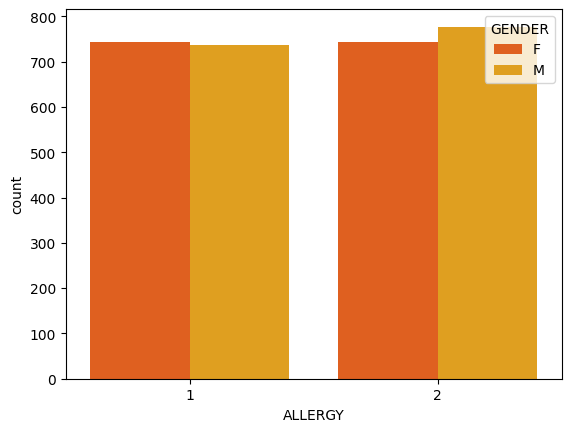

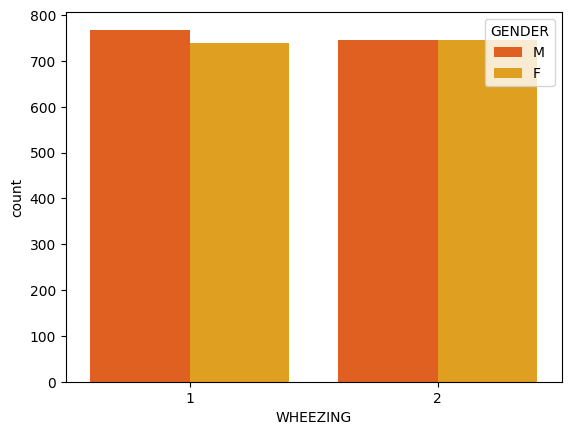

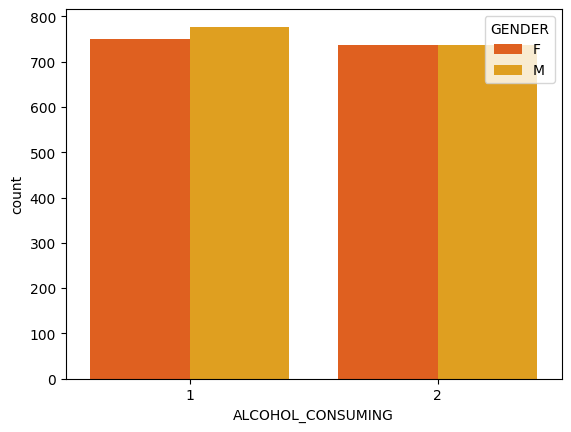

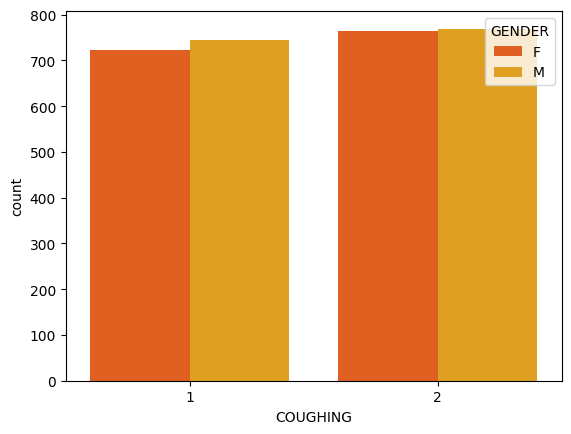

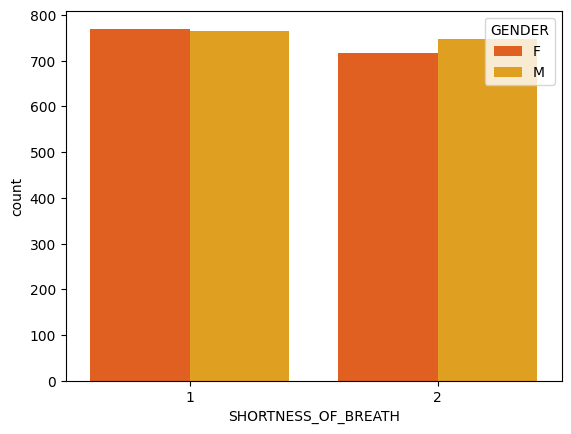

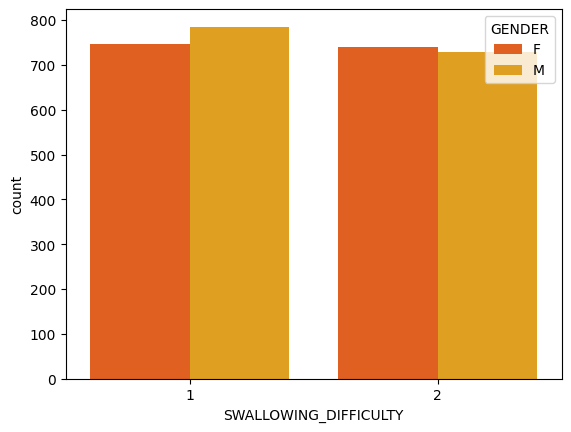

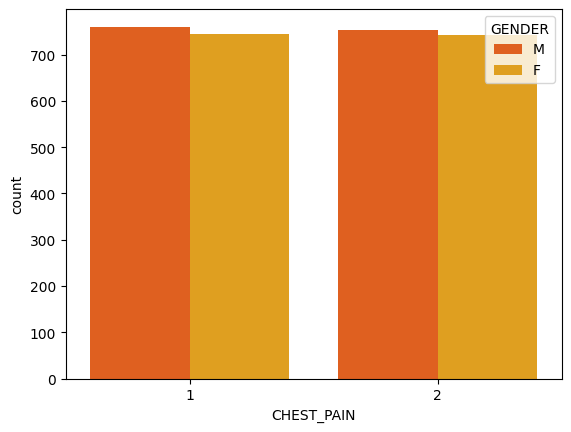

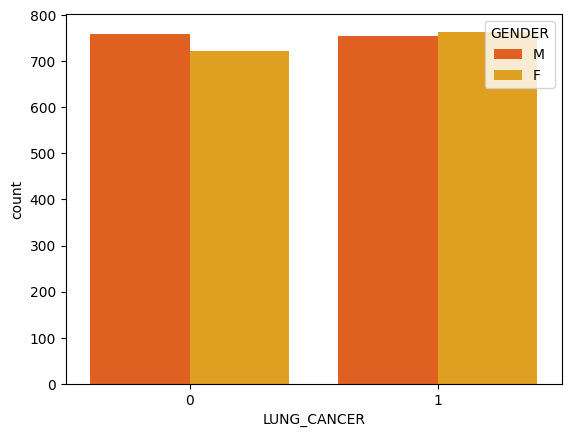

In [36]:
for col in df[df.columns].drop('AGE', axis=1):
    sns.countplot(data=df, x=df[col], hue='GENDER', palette='autumn')
    plt.show()